In [82]:
import numpy as np
import pandas as pd

In [83]:
df_train = pd.read_csv('./data/train.csv')

In [84]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [85]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [86]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [87]:
X_train = df_train[base].values
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]], shape=(7150, 5))

In [88]:
df = pd.read_csv('./data/data_prepared.csv')

n = len(df)
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
# n_train = int(n * 0.6)
n_train = n - n_val - n_test

df = df.iloc[:n_train]

y_train = np.log1p(df.msrp.values)
y_train

array([10.73934884, 10.61277871, 10.50097699, ..., 11.08300372,
       11.11574098, 11.02648346], shape=(7150,))

In [89]:
X_train.shape, y_train.shape

((7150, 5), (7150,))

In [90]:
def train_linear_regression(X, y):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)
  
  w0 = w_full[0]
  w = w_full[1:]
  return w0, w

In [91]:
train_linear_regression(X_train, y_train)

(np.float64(nan), array([nan, nan, nan, nan, nan]))

In [92]:
df_train[base].isna().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [93]:
df_base = df_train[base].fillna(0)
df_base.isna().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [94]:
X_train = df_base.values
X_train, y_train


(array([[ 148.,    4.,   33.,   24., 1385.],
        [ 132.,    4.,   32.,   25., 2031.],
        [ 148.,    4.,   37.,   28.,  640.],
        ...,
        [ 285.,    6.,   22.,   17.,  549.],
        [ 563.,   12.,   21.,   13.,   86.],
        [ 200.,    4.,   31.,   22.,  873.]], shape=(7150, 5)),
 array([10.73934884, 10.61277871, 10.50097699, ..., 11.08300372,
        11.11574098, 11.02648346], shape=(7150,)))

In [95]:
train_linear_regression(X_train, y_train)

(np.float64(10.099807794636035),
 array([-3.01038017e-04,  1.39652505e-02, -1.55962083e-03,  2.29298807e-03,
         4.01791190e-06]))

In [96]:
w0, w = train_linear_regression(X_train, y_train)

In [97]:
y_pred = w0 + X_train.dot(w)

In [98]:
import seaborn as sns

<Axes: ylabel='Count'>

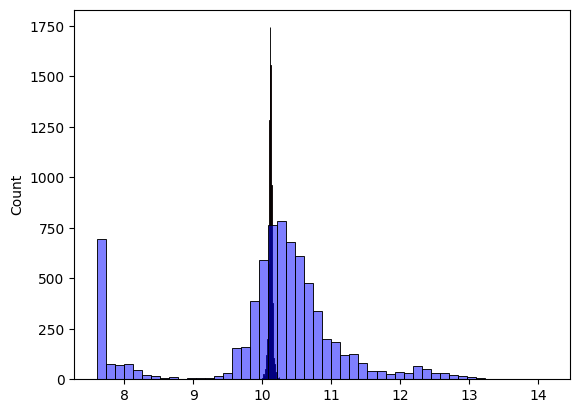

In [99]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)